In [36]:
import numpy as np
import pandas as pd
import scanpy as sc

In [37]:
adata_codex_healthy = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/predicted_codex/predicted_ct_healthy_decoded.h5ad")
adata_codex_tonsilitis = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/predicted_codex/predicted_ct_tonsilitis_decoded.h5ad")

In [52]:
adata_codex_healthy

AnnData object with n_obs × n_vars = 24981 × 31
    obs: 'scportrait_cell_id', 'region', 'shared_leiden_cluster_id', 'cell_type'
    var: 'feature_name'
    uns: 'cell_type_colors', 'neighbors', 'pca', 'spatialdata_attrs', 'umap', 'var_names_hvg', 'var_names_whole_genome'
    obsm: 'X_gexp_log', 'X_gexp_log_whole_genome', 'X_pca', 'X_umap', 'predicted_harmony'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [53]:
adata_codex_tonsilitis

AnnData object with n_obs × n_vars = 19784 × 31
    obs: 'scportrait_cell_id', 'region', 'shared_leiden_cluster_id', 'cell_type'
    var: 'feature_name'
    uns: 'cell_type_colors', 'neighbors', 'pca', 'spatialdata_attrs', 'umap', 'var_names_hvg', 'var_names_whole_genome'
    obsm: 'X_gexp_log', 'X_gexp_log_whole_genome', 'X_pca', 'X_umap', 'predicted_harmony'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## HVGs

In [38]:
adata_real_hvg = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/citeseq/CITEseq_rna_processed.h5ad")

Healthy

In [39]:
adata_hvg_real_healthy = sc.AnnData(X=np.concatenate([adata_real_hvg.layers['X_normalized_log'].todense(),
                                                      adata_codex_healthy.obsm['X_gexp_log']], axis=0))
obs = ["True" for _ in range(len(adata_real_hvg))] + ["Reconstruct" for _ in range(len(adata_codex_healthy))]
obs = pd.DataFrame({"dataset_type": obs})

adata_hvg_real_healthy.obs = obs

sc.tl.pca(adata_hvg_real_healthy)
sc.pp.neighbors(adata_hvg_real_healthy)
sc.tl.umap(adata_hvg_real_healthy)

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


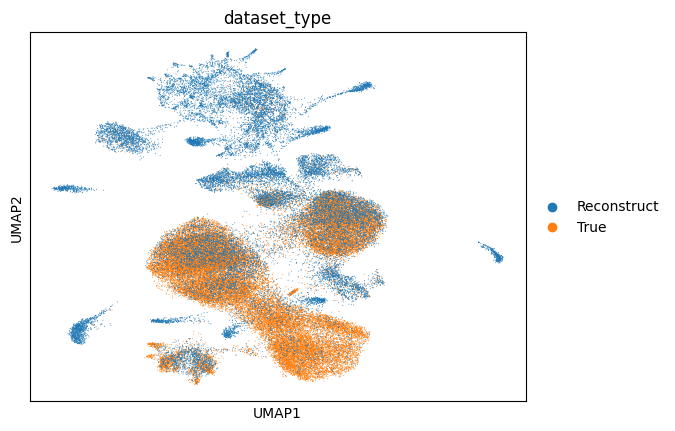

In [40]:
sc.pl.umap(adata_hvg_real_healthy, color="dataset_type")

Tonsilitis 

In [42]:
adata_hvg_real_tonsilitis = sc.AnnData(X=np.concatenate([adata_real_hvg.layers['X_normalized_log'].todense(),
                                                         adata_codex_tonsilitis.obsm['X_gexp_log']], axis=0))
obs = ["True" for _ in range(len(adata_real_hvg))] + ["Reconstruct" for _ in range(len(adata_codex_tonsilitis))]
obs = pd.DataFrame({"dataset_type": obs})

adata_hvg_real_tonsilitis.obs = obs

sc.tl.pca(adata_hvg_real_tonsilitis)
sc.pp.neighbors(adata_hvg_real_tonsilitis)
sc.tl.umap(adata_hvg_real_tonsilitis)

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


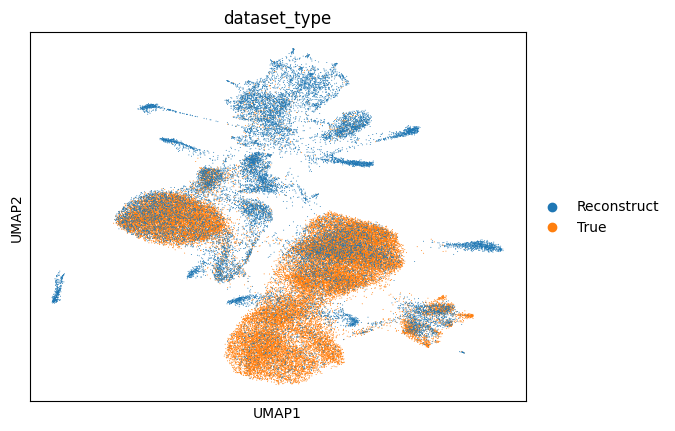

In [43]:
sc.pl.umap(adata_hvg_real_tonsilitis, color="dataset_type")

## Whole genome 

In [47]:
adata_real_whole_genome = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/citeseq/CITEseq_rna_processed_full_genome.h5ad")

Healthy

In [48]:
adata_hvg_real_healthy = sc.AnnData(X=np.concatenate([adata_real_whole_genome.layers['X_normalized_log'].todense(),
                                                      adata_codex_healthy.obsm['X_gexp_log_whole_genome']], axis=0))
obs = ["True" for _ in range(len(adata_real_hvg))] + ["Reconstruct" for _ in range(len(adata_codex_healthy))]
obs = pd.DataFrame({"dataset_type": obs})

adata_hvg_real_healthy.obs = obs

sc.tl.pca(adata_hvg_real_healthy)
sc.pp.neighbors(adata_hvg_real_healthy)
sc.tl.umap(adata_hvg_real_healthy)

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


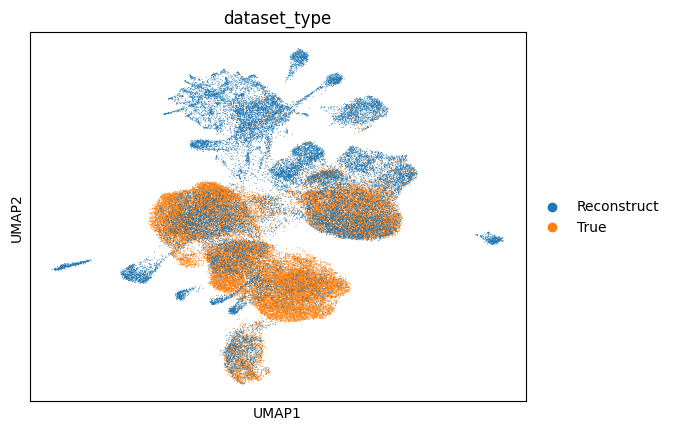

In [49]:
sc.pl.umap(adata_hvg_real_healthy, color="dataset_type")

Tonsilitis

In [50]:
adata_hvg_real_tonsilitis = sc.AnnData(X=np.concatenate([adata_real_whole_genome.layers['X_normalized_log'].todense(),
                                                      adata_codex_tonsilitis.obsm['X_gexp_log_whole_genome']], axis=0))
obs = ["True" for _ in range(len(adata_real_hvg))] + ["Reconstruct" for _ in range(len(adata_codex_tonsilitis))]
obs = pd.DataFrame({"dataset_type": obs})

adata_hvg_real_tonsilitis.obs = obs

sc.tl.pca(adata_hvg_real_tonsilitis)
sc.pp.neighbors(adata_hvg_real_tonsilitis)
sc.tl.umap(adata_hvg_real_tonsilitis)

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


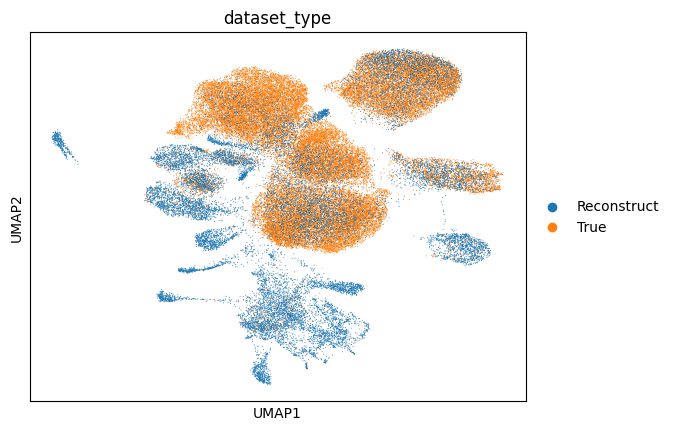

In [51]:
sc.pl.umap(adata_hvg_real_tonsilitis, color="dataset_type")